In [1]:
import pandas as pd
import json
import os
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
# sns.set(style='ticks', context='paper', font='CMU Sans Serif')
sns.set(style='ticks', context='paper')
from collections import defaultdict
import numpy as np
from util import plot_cdf

['ns3: 16448,116134.5,204264', 'pmn-m: 36,167.5,378', 'mlsys_final_reprod_v1: 21,46.5,82']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


mlsys: 0,1


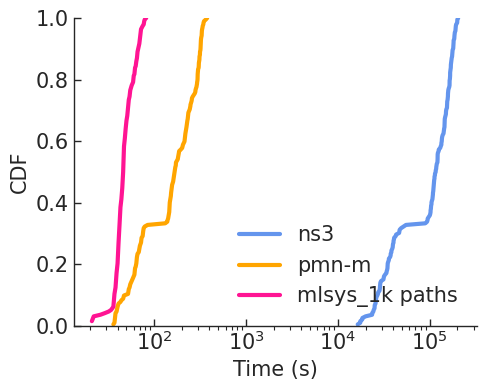

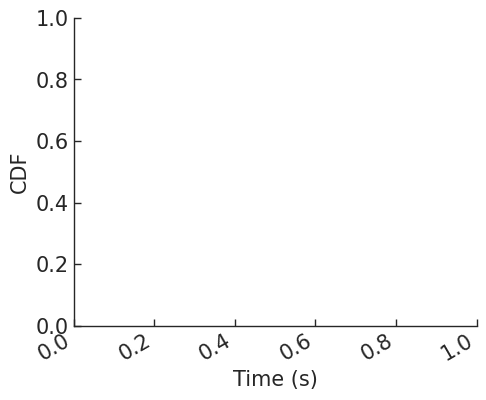

In [2]:
time_elapsed=defaultdict(lambda:[])
time_elapsed_2=defaultdict(lambda:[])
# method_list=['ns3','pmn-m','mlsys_s2_bt50','mlsys_s2_bt50_2k']
method_list=['ns3','pmn-m','mlsys_final_reprod_v1']
root_dir_baseline="/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data"
root_dir_mlsys=root_dir_baseline
time_preprop=defaultdict(lambda:[])
time_path_sim=defaultdict(lambda:[])
for mix_id in range(192):
    for method in method_list:
        if not method.startswith('mlsys'):
            root_dir=root_dir_baseline
            with open(f'{root_dir}/{mix_id}/{method}/elapsed.txt') as file:
                for line in file:
                    tmp=line.rstrip()
                    time_elapsed[method].append(int(tmp))
        else:
            root_dir=root_dir_mlsys
            if os.path.exists(f'{root_dir}/{mix_id}/{method}/elapsed.txt'):
                with open(f'{root_dir}/{mix_id}/{method}/elapsed.txt') as file:
                    for line in file:
                        tmp=line.rstrip().split(',')
                        time_elapsed[method].append(int(tmp[0])-int(tmp[2]))
                        time_elapsed_2[method].append(int(tmp[1]))
            path_id=0
            while os.path.exists(f'{root_dir}/{mix_id}/{method}/path_{path_id}.txt'):
                with open(f'{root_dir}/{mix_id}/{method}/path_{path_id}.txt') as file:
                    for line_id,line in enumerate(file):
                        if line_id==1:
                            tmp=line.rstrip().split(',')
                            time_preprop[method].append(int(tmp[0]))
                            time_path_sim[method].append(int(tmp[1]))
                path_id+=1
            
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
# legend_list=["{}:{:.0f}s, {:.0f}s, {:.0f}s".format(key,np.min(time_elapsed[key]),np.median(time_elapsed[key]),np.max(time_elapsed[key])) for key in time_elapsed]
legend_list=['ns3','pmn-m','mlsys_1k paths','mlsys_2k (time-1)']
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'test.pdf',legend_list,'Time (s)',legend_font=15,group_size=len(method_list),log_switch=True,loc=4)

print(f"mlsys: {len(time_elapsed['mlsys'])},{len(time_elapsed_2)}")

method_str='mlsys_s2_bt100'
res=[np.array(x) for x in [time_elapsed[method_str],time_elapsed_2[method_str], time_preprop[method_str],time_path_sim[method_str]]]
plot_cdf(res,'time_internal.pdf',['mlsys (time-1)','parallel comp for 1000 paths (time-2)','pre-process of each path in parallel comp (time-3)','path-sim of each path in parallel comp  (time-4)'],'Time (s)',legend_font=12,group_size=4,loc=4,rotate_xaxis=True)

# method_str='mlsys_s2_bt50_2k'
# res=[np.array(x) for x in [time_elapsed[method_str],time_elapsed_2[method_str], time_preprop[method_str],time_path_sim[method_str]]]
# plot_cdf(res,'time_internal.pdf',['mlsys (time-1)','parallel comp for 2000 paths (time-2)','pre-process of each path in parallel comp (time-3)','path-sim of each path in parallel comp  (time-4)'],'Time (s)',legend_font=12,group_size=4,loc=4,rotate_xaxis=True)

Traffic Matrix A: (2, 34908)
Traffic Matrix B: (2, 27929)
Traffic Matrix C: (2, 30197)


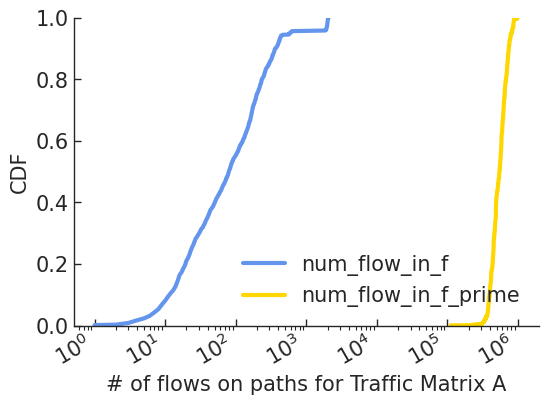

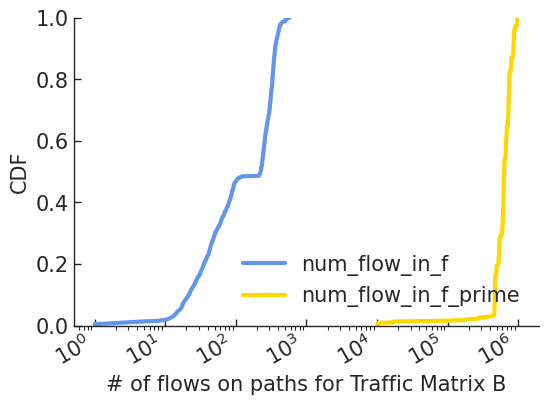

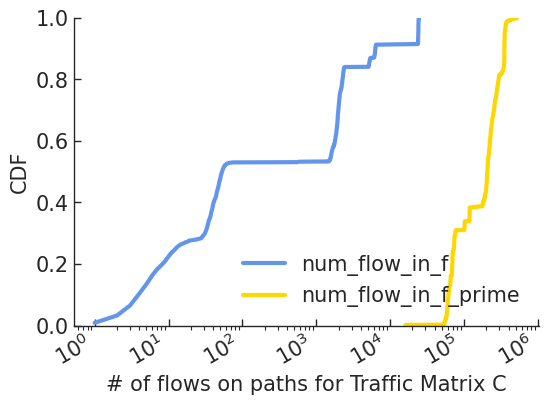

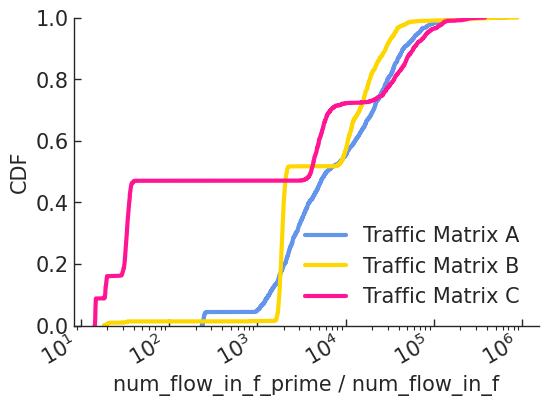

In [9]:
num_flow_in_path=defaultdict(lambda:[])
method_list=['mlsys_bdp_bt10_l30']

file2matrix = {
        '../../workload/spatials/cluster_a_2_16.json': 'Traffic Matrix A',
        '../../workload/spatials/cluster_b_2_16.json': 'Traffic Matrix B',
        '../../workload/spatials/cluster_c_2_16.json': 'Traffic Matrix C',
    }

mix_file = '../spec/all.mix.json'
with open(mix_file) as f:
    mixes = json.load(f) 
for mix_id in range(192):
    mix=mixes[mix_id]
    mix_dir = f'../data/{mix_id}'
    key_val=file2matrix[mix['spatial']]
    for method in method_list:
        path_id=0
        while os.path.exists(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/path_{path_id}.txt'):
            with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/path_{path_id}.txt') as file:
                for line_id,line in enumerate(file):
                    if line_id==0:
                        tmp=line.rstrip().split(',')
                        num_flow_in_path[key_val].append([int(tmp[-3]),int(tmp[-2])])
            path_id+=1
res_ratio=[]
legend_list=[]
for key in sorted(num_flow_in_path):
    res=np.array(num_flow_in_path[key]).transpose()
    print(f"{key}: {res.shape}")
    plot_cdf(res,'xxx.pdf',['num_flow_in_f','num_flow_in_f_prime'],f'# of flows on paths for {key}',legend_font=15,group_size=2,loc=4,rotate_xaxis=True,log_switch=True)
    res_ratio.append(res[1]/res[0])
    legend_list.append(key)
plot_cdf(res_ratio,'xxx.pdf',legend_list,f'num_flow_in_f_prime / num_flow_in_f',legend_font=15,group_size=len(legend_list),loc=4,rotate_xaxis=True,log_switch=True)
    

['mlsys: 167323,323123.0,991516']


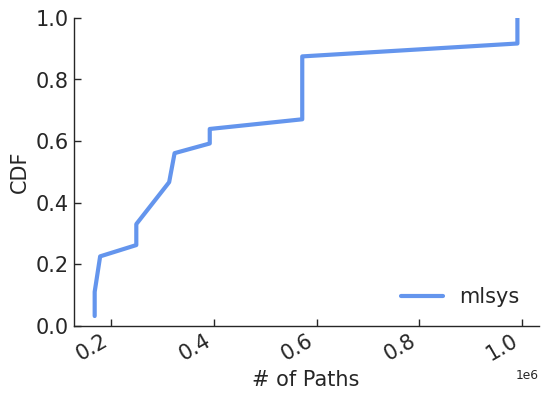

In [8]:
time_elapsed=defaultdict(lambda:[])
method_list=['mlsys']
for mix_id in range(191):
    for method in method_list:
        with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/path.txt') as file:
            number_of_lines = len(file.readlines())
            time_elapsed[method].append(number_of_lines-3)
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'num_path.pdf',method_list,'# of Paths',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)

In [27]:
time_elapsed=defaultdict(lambda:[])
num_flows=defaultdict(lambda:[])
method_list=['flowsim-all']
for mix_id in range(191):
    for method in method_list:
        for path_idx in range(20):
            with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/{path_idx}/output.txt') as file:
                line_idx=0
                for line in file:
                    if line_idx==0:
                        tmp=line.rstrip().split(':')[-1]
                        num_flows[method].append(int(tmp))
                    elif line_idx==1:
                        tmp=line.rstrip().split(':')[-1]
                        time_elapsed[method].append(float(tmp))
                    line_idx+=1
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res_time=np.array(list(time_elapsed.values()))
res_flow=np.array(list(num_flows.values()))
plot_cdf(res_flow,'num_flows.pdf',method_list,'# of flows in each path-level sim',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)
plot_cdf(res_time,'time_elapsed.pdf',method_list,'Time (s) for each path-level sim',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)

FileNotFoundError: [Errno 2] No such file or directory: '/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/0/flowsim-all/0/output.txt'